# Retrieval using Bag of Visual Words

In this tutorial you will compare bag of words handcrafted features with a pre-trained neural network  as a feature extractor for image retrieval. In this first part we will employ feature quantization as a mean to speed up image retrieval on images with ~10,000 local image features  each.
##What is Image Retrieval?

Image retrieval is the task of, given a *query* image, re-ordering a set of images so that images which are most similar to the query have higher rank than less similar ones. A practical example would be, given a picture of the Tour Eiffel, and a folder containing thousands of images, find the three that depict the famous Paris monument.



##Dataset
Il dataset si compone di immagini naturali di ambienti esterni ed indoor. Vogliamo fare retrieval, quindi, data una query, andiamo a prendere all'interno di un set di gallery (quindi un altro set di immagini), l'immagine più vicina all'immagine di query. Per fare questo useremo delle rappresentazioni handcrafted.
We are going to use the Holidays dataset created by INRIA. Holidays dataset is an annotated set of 1491 images with 500 query images.
http://lear.inrialpes.fr/~jegou/data.php
We will download precomputed [SIFT](https://www.cs.ubc.ca/~lowe/keypoints/) descriptors. SIFT has is a 128 dimensional histogram of orientations and it is extracted using scale and orientation invariant [operators](http://fourier.eng.hmc.edu/e161/lectures/gradient/node9.html).

##Example images from Holidays
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/101800_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/101800_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/105000_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/105000_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/108103_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/108103_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/111601_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/111601_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/114701_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/114701_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/117102_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/117102_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/121001_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/121001_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/125701_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/125701_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/127000_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/127000_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/131401_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/131401_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/112003_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/112003_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/115201_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/115201_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/118501_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/118501_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/123205_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/123205_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/125900_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/125900_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/129202_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/129202_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/131802_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/131802_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/102501_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/102501_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/107300_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/107300_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/110701_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/110701_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/112301_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/112301_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/115501_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/115501_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/120300_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/120300_sm.jpg" width=150></a>
<a href="http://lear.inrialpes.fr/~jegou/data/holidays/125501_sm.jpg"><img src="http://lear.inrialpes.fr/~jegou/data/holidays/125501_sm.jpg" width=150></a>




In [ ]:
#install cupy in case you have a GPU runtime this can speed up numpy computation
from IPython.utils import io
#with io.capture_output():
#  !apt -y -q install cuda-libraries-dev-9-2
#  !pip install -q cupy-cuda92 chainer
import cupy as cp


In [ ]:
#import dependencies
import glob
import numpy as np
import ntpath
from IPython.utils import io
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive') #mount your google drive to export images, features, data, etc...

# montiamo il nostro google drive all'interno del colab in maniera tale da poter trovare tutti i file all'interno del drive

Mounted at /content/gdrive


In [ ]:
#function to show neat progress bars
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))



##Let's download the Features!
We will simply run wget inside the notebook. Features can be extracted again using  Krystian Mikolajczyk  [implementation](http://pascal.inrialpes.fr/data/holidays/compute_descriptors).
Any other feature extractor can be used, but in such case dictionary must recomputed using feature extracted with the same procedure (possibly same code...) to make sure dictionary centroids and extracted features are consistent (normalization, quantisation, clipping etc etc).

Some examples of feature extraction libraries:

1.   VLFEAT - http://www.vlfeat.org/
2.   OpenCV - https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html
3.   SIFTGPU - https://github.com/pitzer/SiftGPU











In [ ]:
# get the SIFT features via ftp
# estrazione sift
# se si mette il ! si esegue un comando di linux, wget va a scaricare quello che è indicato

!wget ftp://ftp.inrialpes.fr/pub/lear/douze/data/siftgeo.tar.gz

--2023-10-30 07:18:21--  ftp://ftp.inrialpes.fr/pub/lear/douze/data/siftgeo.tar.gz
           => ‘siftgeo.tar.gz’
Resolving ftp.inrialpes.fr (ftp.inrialpes.fr)... 194.199.18.221
Connecting to ftp.inrialpes.fr (ftp.inrialpes.fr)|194.199.18.221|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/lear/douze/data ... done.
==> SIZE siftgeo.tar.gz ... 551669546
==> PASV ... done.    ==> RETR siftgeo.tar.gz ... done.
Length: 551669546 (526M) (unauthoritative)

siftgeo.tar.gz      100%[===================>] 526.11M  12.2MB/s    in 52s     

2023-10-30 07:19:14 (10.2 MB/s) - ‘siftgeo.tar.gz’ saved [551669546]



In [ ]:
with io.capture_output() as extracted_files: #this will avoid cluttering with the output. Remove this line to see command line output
  !tar xzvf siftgeo.tar.gz

# tar va ad estrarre il contenuto
# ogni volta che si fa ripartire colab bisogna ricaricare ed estrarre il tutto


In [ ]:
# visualizza contenuto cartella con cui stiamo lavorando

ls

##Let's download the codebooks!

We will simply run wget inside the notebook. This archive contains visual dictionaries of different sizes (100, 200, 500, 1K, 2K, 5K, 10K, 20K, 50K, 100K and 200K visual words, 144MB) learned on Flickr60K.

Definiamo la dimensione del dizionario, più è grande e più fine sarà la rappresentazione

In [ ]:
!wget ftp://ftp.inrialpes.fr/pub/lear/douze/data/clust.tar.gz #get the dictionaries
with io.capture_output() as extracted_files: #this will avoid cluttering with the output. Remove this line to see command line output
  !tar xzvf clust.tar.gz

# tutto in una cella, scarico dizionario ed estraggo
# scarico le visual word
# abbiamo a disposizione dizionari a diverse dimensioni

--2023-10-30 07:19:37--  ftp://ftp.inrialpes.fr/pub/lear/douze/data/clust.tar.gz
           => ‘clust.tar.gz’
Resolving ftp.inrialpes.fr (ftp.inrialpes.fr)... 194.199.18.221
Connecting to ftp.inrialpes.fr (ftp.inrialpes.fr)|194.199.18.221|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/lear/douze/data ... done.
==> SIZE clust.tar.gz ... 150388107
==> PASV ... done.    ==> RETR clust.tar.gz ... done.
Length: 150388107 (143M) (unauthoritative)

clust.tar.gz        100%[===================>] 143.42M  7.40MB/s    in 21s     

2023-10-30 07:19:59 (6.91 MB/s) - ‘clust.tar.gz’ saved [150388107]

--2023-10-30 07:19:59--  http://the/
Resolving the (the)... failed: Name or service not known.
wget: unable to resolve host address ‘the’
--2023-10-30 07:19:59--  http://dictionaries/
Resolving dictionaries (dictionaries)... failed: Name or service not known.
wget: unable to resolve host address ‘dictionaries’
FINI

##Import binary features in numpy arrays
Here we are going to use a nice feature of NumPy. We will define a datatype


```
np.dtype([('xy', np.float32, (2,)),('meta', np.float32, (7,)),('desc_dim', np.int32) ,('desc', np.uint8, (128,))])
```

.. and read all descriptors using



```
np.fromfile(opened_file,dtype=sift_dtype)
```




In [ ]:
files = glob.glob('siftgeo/*.siftgeo')
imnames = [ntpath.basename(f).split('.')[0] for f in files] # files sono tutti i file che finiscono con .siftgeo, se metto [0] prendo il primo
len(files)

# glob cerca nella memoria della macchina la cartella siftgeo e prende tutti i file (*) che finiscono con "siftgeo"
# poi si prendono i nomi delle immagini, si fa una lista di nomi, si fa uno split sul . (si prende la parte a sx)
# ntpath.basename(files[0]) prende il primo file senza .siftgeo
# imnames saranno tutti i nomi delle immagini, gli id
# ci sono 1491 file (immagini)

# andiamo ad estrarre i nomi delle immagini, andiamo a cercare nella memoria del nostro pc la cartella siftgeo e prendiamo tutti i file che finiscono con siftgeo

1491

In [ ]:
print('il nome della prima immagine è:', imnames[0])

il nome della prima immagine è: 124601


In [ ]:
print('il path del primo elemento è:', files[0])
# primo elemento, per vedere costruizione del path, path locale nella macchina
print('path:',files[0], 'nome immagine:',imnames[0])

il path del primo elemento è: siftgeo/124601.siftgeo
path: siftgeo/124601.siftgeo nome immagine: 124601


In [ ]:
# andiamo a costruire il dizionario dei SIFT, ogni elemento ha dei campi, a noi interessano i descrittori
# xy dà informazioni spaziali

# andiamo a processare i sift per creare un dizionario img_descs (ci mettiamo i descrittori), che associa all'id dell'immagine, l'array con i sift
# si fa un dizionario per mantenere la relazione nome dell'immagine-descrittori, e inoltre perché il numero di sift per un'immagine può variare

sift_dtype = np.dtype([('xy', np.float32, (2,)),('meta', np.float32, (7,)),('desc_dim', np.int32) ,('desc', np.uint8, (128,))])
img_descs = {} # per ogni immagini voglio costruire dizionario fatto da nome immagine e descrittori sift
out = display(progress(0, len(files)), display_id=True) # progress bar
ii=0
for f in files: # files lista di path
  with open(f,'rb') as d: # per ogni file leggo e vado a costruire il dataframe
    all_desc=np.fromfile(d,dtype=sift_dtype) # all desc contiente tutti i descrittori riferiti a una immagine
  imname = ntpath.basename(f).split('.')[0] # il nome è il numero 137704, imname è la chiave, il valore è la riga dopo a dx, voglio estrarre solo il campo 'desc'
  img_descs[imname] = np.array([d['desc'] for d in all_desc])
  ii+=1
  out.update(progress(ii, len(files)))

  # all'interno di .siftgeo abbiamo una lista (prima riga) con vari campi, desc_dim intero 128 (desc)
  # creiamo un dizionario vuoto in cui ci mettiamo solo i sift, buttando via il resto
  # non potevamo fare un array a livello iniziale perché avevamo diversi campi, ci servivano tipi uguali, non diversi

  # prendo i sift e li converto in array numpy

  # andiamo a prendere per ciascuno di questi file tutti i descrittori
  # all'interno di questi .siftgeo ci sono tantissime informazioni che non sono altro che una lista in cui ci sono vari campi, c'è il campo 'xy' che si riferisce al punto in cui è stato estratto il sift, dei meta dati, la dimensione del descrittore (essendo un sift è 128)
  # e poi il descrittore stesso, quindi una lista di 128 elementi (è un istogramma) e ogni bin ha un certo determinato valore che è un intero, ci dice quante direzioni sono lungo quell'asse

  # successivamente abbiamo creato un dizionario vuoto in cui ci andiamo a mettere soltanto i sift, il resto lo buttiamo via



In [ ]:
print('shape:',img_descs['135103'].shape)
print('righe:',img_descs['135103'].shape[0])
print('colonne:',img_descs['135103'].shape[1])

# qui abbiamo 1537 righe x 128 colonne, se metto [0] dopo il nome, estraggo la prima riga (128 colonne)
# ovviamente ci sono 1536 righe
# se stampo la img_descs['118300'] ci sono tutti i 1537 x 128 descrittori


shape: (11660, 128)
righe: 11660
colonne: 128


In [ ]:
f = files[0]
f
with open(f,'rb') as d: # con with python capisce che tutto quello che è dentro nell'identazione viene aperto e poi chiuso
  all_desc=np.fromfile(d,dtype=sift_dtype) # leggiamo il file e gli diciamo il tipo
len(all_desc)

imname = ntpath.basename(f).split('.')[0] # ne abbiamo estratto il nome

a = np.array([d['desc'] for d in all_desc])
a.shape # numero descrittori e quanto sono lunghi

# all'interno abbiamo 1537 descrittori istogrammi, ognuno con 128 elementi

# ogni immagine ha il suo numero di sift, sono 1680 elmementi ognuno da 128, quindi 1680 istogrammi

(1727, 128)

Dataset has been parsed we now have stored all image names (withouth path and extension) i


```
imnames
```
and all sift descriptors are indexed via imnames in the dictionary


```
img_descs
```





In [ ]:
print('Image %s.jpg descriptor array: %d,%d' % (imnames[10],img_descs[imnames[10]].shape[0], img_descs[imnames[10]].shape[1]))

Image 114902.jpg descriptor array: 7044,128


In [ ]:
#same as for features, we define a dtype and read into memory a dictionary of a K words
centroid_dtype = np.dtype([('desc_dim', np.int32) ,('desc', np.float32, (128,))])
ii=0
f = 'clust/clust_flickr60_k500.fvecs' # 200 words dictionary, prendiamo il dizionario # nell'esercizio in classe era 2000
with open(f,'rb') as d:
  all_centroids=np.fromfile(d,dtype=centroid_dtype)
centroids = np.array([d['desc'] for d in all_centroids])

dict_size = centroids.shape[0]

# print(dict_size) # dimensione dizionario = 2000

# andiamo a defire un datatype per i centroidi, che non sono altro che le nostre visual words,
# andiamo a prendere il dizionario composto da 2000 word


In [ ]:
print(np.linalg.norm(centroids[0]), np.linalg.norm(img_descs[imnames[0]][0]))
# si prende i descrittori della prima immagine [0]  e di questo ne andiamo a estrarre il primo in posizione 0, [0], si prende il primo sift
# facciamo la norma di questo istogramma per confrontarla con la norma del centroide, per capire quanto dista questo sift dal centroide 0

# la prima è la norma di una parola visuale (cluster) e la norma di uno dei sift dell'immagine
# questa stampa serve a due cose
# 1) è un controllo per vedere se abbiamo caricato bene i dati
# 2) norma non normalizzata


# qui si prendono i descrittori della prima immagine, 1680, e di questi estraiamo il primo, quello in posizione 0
# quindi prendo il primo sift
# faccio la norma due dell'istogramma, possiamo andarla a confrontare con la norma del centroide, questo confronto ci permette di capire le posizioni relative, quanto dista questo sift di questa immagine dal centroide 0
# vogliamo assofciare un sift a un centroide, a una visual word, per capire in quale bin della nostra bow noi andiamo a cadere

459.4357 508.1417125172859


##Exercise 1
- Capire per ogni sift a quale centroide sono più vicino (nn, coseno) e poi calcolarmi l'istogramma.

- Andare a calcolare la bow per un'immagine, quindi non solo fare un confronto tra un centroide e un sift dell'immagine, ma andare a capire per ogni sift di questa immagine, a quale centroide, tra i 200, io sono più vicino. Infine calcolare la bow riferita a questa immagine

- Calcolare distanza tra sift e centroidi

Compute a single BOW and show what it looks like. Remember the steps:


Consider all SIFT descriptors of an image, for example these are for the first image:


```
img_descs[imnames[0]]
```


1.   For each SIFT feature descritpor *d*  find its nearest cluster and the respective id


```
cluster_ids
```


2.   Create a np.array of shape (1,dict_size) containing counts of cluster_ids

Your bag of words should roughly look like the random generated vector below

CAVEAT: Be careful of images that may not have SIFT extracted. For safety use a vector of zeros.


In [ ]:
# usare metrica similarità coseno, ma va bene anche la distanza
# con la SIMILARITA' prendiamo ovviamente il valore più grande con argmax
# con la DISTANZA si prende il valore più piccolo con argmin

# NB: ARGMAX E ARGMIN RITORNANO RISPETTIVAMENTE L'INDICE DEL VALORE MASSIMO E MINIMO, NON IL VALORE MASSIMO E MINIMO !!!

# cosine similarity: a*b / (norm(a)*norm(b))

def cosine_similarity(a, b):
  a_norm = np.linalg.norm(a, axis=-1) # implemento le norme
  b_norm = np.linalg.norm(b, axis=-1)
  return np.matmul(a, b)/(a_norm * b_norm) # prodotto matriciale

# altre funzioni da implementare
# anche l'euclidea va bene

# approccio che va bene


In [ ]:
print("shape del vettore dei centroidi:\n", centroids.shape)

print("\nshape della prima immagine:\n", img_descs[imnames[0]].shape) # vediamo quanti descrittori ha

print("\nprendo il primo descrittore:\n", img_descs[imnames[0]][0].shape) # prendo il primo descrittore della prima immagine. vettore di 128 colonne


# if you try to compute the similarity between all centroids and a single descriptor, you will obtain a vector with similarities between
# questo è un vettore con tutte le similarità dei centroidi e tutti gli elementi del primo descrittore della prima immagine

print("\nil vettore delle cosine similarity è:\n", cosine_similarity(centroids, img_descs[imnames[0]][0]))

# prendo tutte le visual words/centroidi (200) e chiamo la cosine similarity per un sift (primo sift per la prima immagine)
# trova il risultato tra tutti i centroidi e il sift
# il più simile viene estratto con argmax, assegno l'id

# prendo i valore della similarità
sim = cosine_similarity(centroids, img_descs[imnames[0]][0])

# e assegno l'id della word
word_id = np.argmax(sim)
print("\nid della world (indice argmax) sarà:\n", word_id)

# così riesco a capire a quale centroide il mio sift sarà più simile

shape del vettore dei centroidi:
 (500, 128)

shape della prima immagine:
 (1727, 128)

prendo il primo descrittore:
 (128,)

il vettore delle cosine similarity è:
 [0.82382095 0.79082626 0.08197542 0.21525078 0.76203907 0.6103736
 0.7399791  0.6538479  0.4556319  0.12182991 0.6906702  0.19446298
 0.15685591 0.21012264 0.16318424 0.21265714 0.7846937  0.18451531
 0.29947272 0.13201465 0.78312206 0.12571451 0.15091918 0.5904555
 0.23098211 0.16587836 0.21506134 0.73059344 0.64455247 0.13114198
 0.7491657  0.07982523 0.23591249 0.09418066 0.32731792 0.77513456
 0.6997166  0.41120723 0.3045933  0.27299023 0.73622674 0.49016526
 0.12939666 0.71358323 0.627539   0.52281296 0.49618044 0.20938542
 0.674532   0.18830976 0.36127424 0.20134708 0.74698037 0.21767968
 0.24246486 0.6160906  0.10396785 0.2176755  0.75958484 0.8346549
 0.33276    0.22629012 0.62003994 0.7788682  0.5802442  0.509161
 0.2543208  0.6497327  0.5076016  0.7212618  0.0463427  0.07944278
 0.30901995 0.11938152 0.7675339  0.

Per fare la bow bisogna andare a trovare gli indici corrispondenti del cluster migliore, quindi quello più simile

In [ ]:
# devo costruirmi la bow per tutti i sift, come faccio?
# per capire il mio sift a quale centroide è più vicino, è più simile, voglio costruire la bow ovvero per ogni sift che ho, vado a trovare il centroide più vicino
# farò un ciclo for per ogni descrittore che ho associato alla mia immagine, devo fare questo
# e poi, per calcolare l'istogramma, devo contare quanti sift sono più vicini al centroide con id 0, id 2... id 200
# es: se io ho due sift che sono più simili di tutti al centroide con id 958, questa posizione avrà un bin a 2
# si fa for sull'immagine, si va a capire qual è id più simile al nostro sift e poi andare ad aumentare la posizione dell'istogramma corrispondente, si va a contare quanti sift hanno quel centroide

# let's compute the bow for the image imnames[0]
# we can make a loop over all descriptors and find the closest centroid

import time

tt = time.time()

# inizialiazzato un array di 0 lungo quanto il nostro dizionario, che poi sarà il bow dell'immagine 0. array di 200 posizioni
# initialize bag of words
bow0 = np.zeros((len(centroids), ))

# descriptors for the first image
# mi metto da parte i descrittori della prima immagine
descs0 = img_descs[imnames[0]]

# let's print some useful info
print('centroids: {}'.format(centroids.shape))
print('descriptors: {}'.format(descs0.shape))

# loop over descriptors
for d in descs0:
  # compute similarities
  similarities = cosine_similarity(centroids, d) # calcolo per tutti
  # find the most similar centroid
  most_similar_cluster_id = np.argmax(similarities) # prendo il più simile
  # update the bag of words
  bow0[most_similar_cluster_id] += 1 # aumento bin


# ciclo sui descrittori, per ogni descrittore calcolo la similarità coseno tra un singolo descrittore e tutti i centroidi
# similarities sarà un vettore di similarità tra un singolo sift e tutti i centroidi del dizionario
# voglio il più simile -> argmax
# facendo così riempiamo bow0
# sta già facendo l'istogramma, sta contando le occorrenze che sono andate a cadere in ogni bin

print('Took {} seconds'.format(time.time() - tt))

centroids: (500, 128)
descriptors: (1727, 128)
Took 0.18014836311340332 seconds


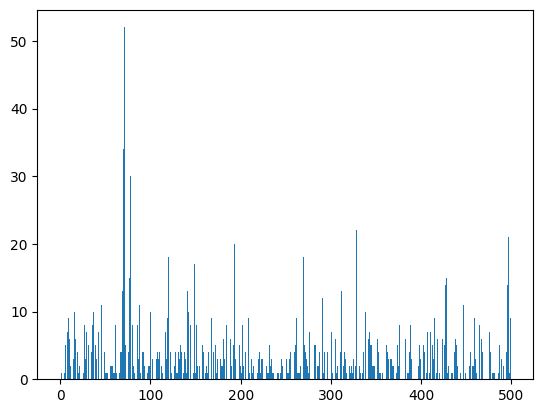

In [ ]:
# plot the bow
plt.bar(range(len(bow0)), bow0)
plt.show()


# 1680 descrittori
# il picco vuol dire che abbiamo una parola nel dizionario dove tanti sift sono andati a cadere lì
# se l'istogramma molto sparso -> forse un descrittore più piccolo va meglio

Possiamo andare più veloci?

In [ ]:
centroid_norms = np.linalg.norm(centroids, axis=-1)[:, None]
normalized_centroids = centroids/centroid_norms

# qui stiamo facendo in un colpo solo tutte le norme dei centroidi sull'asse -1 (righe)
# poi si prendono tutti i centroidi e si dividono per la loro norma

tt = time.time()

# initializate the bag of words
bow0 = np.zeros((len(centroids), ))

# compute the norm of each descriptor by specifying the axis over which the operation should be computed (axis = -1 means the )
descs_norms = np.linalg.norm(descs0, axis=-1)[:, None]

# normalize all the descriptors at once
normalized_descriptors = descs0/descs_norms

# compute similarities by just multuplying the normalized vectors
similarities = np.matmul(normalized_centroids, normalized_descriptors.T)

# find the most similar centroid for each sift
best_centroid_ids = np.argmax(similarities, axis = 0)

# update for the bow

bow0, edges = np.histogram(best_centroid_ids, bins = dict_size, range=(0, dict_size))

print(time.time() - tt)

0.035044193267822266


In [ ]:
# each row should now be normalized!
print(np.linalg.norm(normalized_descriptors[0, :]))

0.9999999999999999


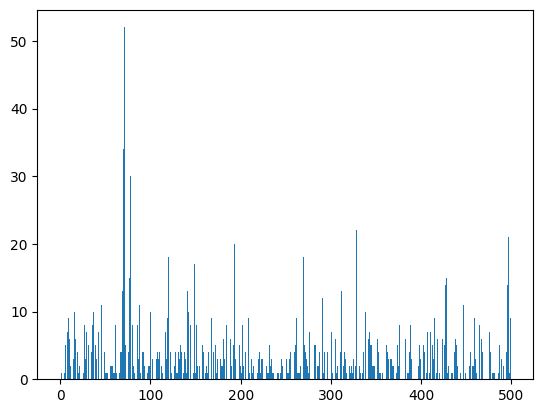

In [ ]:
# plot the bow

plt.bar(range(len(bow0)), bow0)
plt.show()

# NearestNeighbors
Abbiamo fatto tutto a mano, ma dobbiamo essere più efficienti.

Il processo viene velocizzato con l'uso della libreria


In [ ]:
from sklearn.neighbors import NearestNeighbors

0.029021263122558594
Took 0.5441601276397705 seconds


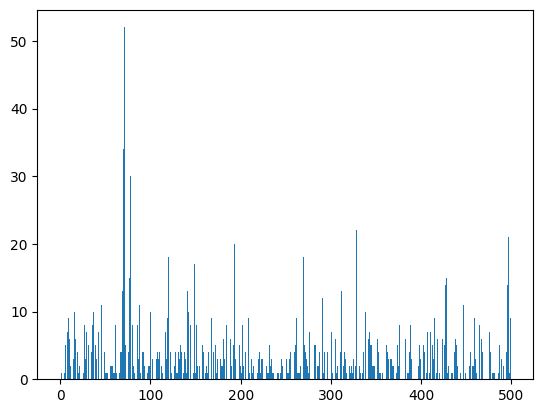

In [ ]:
# descriptors for the first image
descs0 = img_descs[imnames[0]]

tt = time.time()
# we firs define a NearestNeighbors object, by specifyin the number of neughbors and the metric. We then use the method "fit" to let the underlying algorithm organize the data
nbrs = NearestNeighbors(n_neighbors = 1, algorithm = 'auto', metric = 'cosine').fit(centroids) # n = 1 , il più simile, con metric scelgo le varie metriche
# fit costruisce un indice in maniera tale che nbrs (indice) quando chiama la funzione NearestNeighbors, non farà tutti i confronti, ma di meno

# find the nearest neighbors for each descriptor
# per ogni descrittore cerca il neighbor più vicino
distances, cluster_ids = nbrs.kneighbors(descs0)
# la funzione ritorna due vettori, array le distanze di ogni sift da ogni centroide e l'id del cluster (argmax corrispondente)
# trova per ogni sift qual è l'id più vicino e qual è la distanza dall'id e il sift
# per ogni sift, una lista di id

bow, edges = np.histogram(cluster_ids.ravel(), bins = dict_size, range=(0, dict_size)) # ravel fa un flat dell'array
# array di 1680 elementi, ognuno è una lista di un elemento. bin = 200
# perché un elemento? perchè n = 1
print(time.time() - tt)

plt.bar(range(len(bow)), bow)
plt.show

print('Took {} seconds'.format(time.time() - tt))


# andiamo a definire il modulo nearestneighbor e quanti vicini devo cercare, facciamo una associazione univoca (un solo vicino)
# andiamo a definire una funzione che mi andrà a cercare il più vicino con la metrica coseno

# il modulo ci richiede il fit dei centroidi
# più veloce che farselo a mano
# il fit costruisce un indice, siccome questo modulo ci servirà per andare più veloce, per velocizzare il processo di ricerca si costruiscono degli indici, non si fanno confronti quando non sono necessari (indice: nbrs)


# qui abbiamo fatto il tutto per una singola immagine

In [ ]:
(bow == bow0).all()

# gli istogrammi sono uguali
# ritorna True se sono tutti True, AND logico

True

In [ ]:
print(distances.shape)
print(cluster_ids) # dà l'id della visual word a cui il SIFT corrisponde


(1727, 1)
[[237]
 [468]
 [237]
 ...
 [335]
 [350]
 [ 14]]


#Compute all Bag-of-Words!
Vogliamo fare image retrieval con bow usando il dataset Holidays

Vogliamo ripetere questa operazione per tutte le immagini! vogliamo costruire il bow

Per ogni immagine dobbiamo prendere la bow e metterlo dentro questo array che avrà dim totali:

##Exercise 2
Compute the final np.array holding all bag of words, one per image:


```
bow_array
```
having a shape (1491, dict_size)

qui dict_size = 2000

##Questions


1.   Is it possible to map a feature on multiple centroids?
sì, When do you think this is important?
2.   How can we weight local features in the histogram?





In [ ]:
cuda = True # cuda è per schede video nvdia, viene utilizzata per il calcolo parallelo, velocizza di molto l'esecuzione di codice, particolarmente utile nelle reti neurali
out = display(progress(0, len(files)), display_id=True)
ii=0
bow={}#
normalize_bow=False#
K=5 # quanti vicini considerare

'''
# BECCATINI

for k in imnames:
  descs = np.array(img_descs[k])


  ii+=1
  out.update(progress(ii, len(files)))


#
'''
bow={}
bow_array = np.zeros((len(imnames), len(centroids), ))

'''
# CON LISTA
# con due for ci troviamo la soluzione "a mano"
# k è una stringa, ma gli array vogliono un indice intero, si mette enumerate che dà elemento e indice (posizione)
for idx, k in enumerate(imnames): # si prendeva i nomi di tutte le immagini e prendeva i descrittori dell'immagine k-esima
  descs = np.array(img_descs[k])
  for d in descs:
  # compute similarities
    similarities = cosine_similarity(centroids, d)
  # find the most similar centroid
    most_similar_cluster_id = np.argmax(similarities)

  # update the bag of words
    bow[most_similar_cluster_id]+= 1
    bow_array[idx][most_similar_cluster_id] # idx indice immagine che sto scorrendo

ii+=1
out.update(progress(ii, len(files)))
plt.bar(range(len(bow)), bow)
plt.show

print('Took {} seconds'.format(time.time() - tt))


# CON DIZIONARIO
for k in imnames: # si prendeva i nomi di tutte le immagini e prendeva i descrittori dell'immagine k-esima
  descs = np.array(img_descs[k])
  for d in descs:
  # compute similarities
    similarities = cosine_similarity(centroids, d)
  # find the most similar centroid
    most_similar_cluster_id = np.argmax(similarities)

  # update the bag of words
    bow[most_similar_cluster_id] += 1
    bow_array[k][most_similar_cluster_id] # idx indice immagine che sto scorrendo

ii+=1
out.update(progress(ii, len(files)))

plt.bar(range(len(bow)), bow)
plt.show

print('Took {} seconds'.format(time.time() - tt))

'''

'\n# CON LISTA\n# con due for ci troviamo la soluzione "a mano"\n# k è una stringa, ma gli array vogliono un indice intero, si mette enumerate che dà elemento e indice (posizione)\nfor idx, k in enumerate(imnames): # si prendeva i nomi di tutte le immagini e prendeva i descrittori dell\'immagine k-esima\n  descs = np.array(img_descs[k])\n  for d in descs:\n  # compute similarities\n    similarities = cosine_similarity(centroids, d)\n  # find the most similar centroid\n    most_similar_cluster_id = np.argmax(similarities)\n\n  # update the bag of words\n    bow[most_similar_cluster_id]+= 1\n    bow_array[idx][most_similar_cluster_id] #idx indice immagine che sto scorrendo\n\nii+=1\nout.update(progress(ii, len(files)))\nplt.bar(range(len(bow)), bow)\nplt.show\n\nprint(\'Took {} seconds\'.format(time.time() - tt))\n\n\n# CON DIZIONARIO\nfor k in imnames: # si prendeva i nomi di tutte le immagini e prendeva i descrittori dell\'immagine k-esima\n  descs = np.array(img_descs[k])\n  for d in 

In [ ]:
def compute_bow(centroids, desc, n_neighbors=1, metric='cosine'):
  if len(desc)==0:
    return np.zeros((len(centroids),))

  dict_size = len(centroids)
  # We first define a NearestNeighbors object, by specifyin the number of neighbors and the metric. We then use the method "fit" to let the underlying algorithm organize the data.
  nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto', metric=metric).fit(centroids)

  # Find the nearest neighbors for each descriptor
  distances, cluster_ids = nbrs.kneighbors(desc)
  bow, edges = np.histogram(cluster_ids.ravel(), bins=dict_size, range=(0,dict_size))
  return bow


# abbiamo costruito un array bow per ogni immagine
# presi i descrittori di unìimmagine, mi calcolava i nn per questa immagine e da quelli costruivo l'istogramma, che non è altro che la bow

In [ ]:
def compute_all_bows(centroids, image_descriptors, imnames, n_neighbors, metric='cosine'):
  num_images = len(imnames)
  out = display(progress(0, num_images), display_id=True)
  bow_array=np.empty((num_images, dict_size), np.float32)
  for idx, imname in enumerate(imnames):
    cur_bow = compute_bow(centroids, image_descriptors[imname], n_neighbors, metric)
    bow_array[idx] = cur_bow
    out.update(progress(idx, num_images))
  return bow_array

# prende i descrittori, prende i centroidi, ci fa un ciclo (enumerate) e va a chiamare la funzione compute_bow per una immagine, faccio un ciclo
# NB: a volte un'immagine non ha sift, allora si mette un controllo che ci dà un istogramma vuoto (di zeri)

In [ ]:
bow_array = compute_all_bows(centroids, img_descs, imnames, n_neighbors=1, metric='cosine')



In [ ]:
bow_array.shape

(1491, 500)

Text(0, 0.5, 'mean Average Precision')

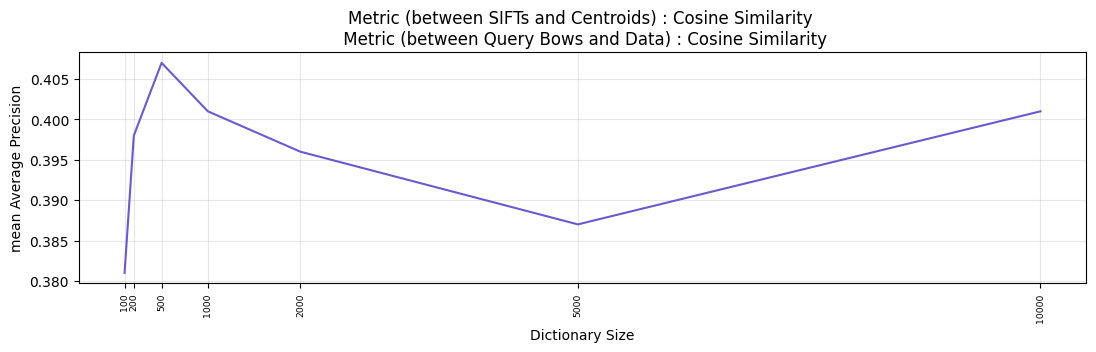

In [ ]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

dst_ports = [100, 200, 500, 1000, 2000, 5000, 10000]
dst_port_count = [0.381, 0.398, 0.407, 0.401, 0.396, 0.387, 0.401]
labels = ['100', '200', '500', '1000', '2000','5000','10000']

fig = plt.figure(figsize=(13, 10))

# aesthetics and data
plt.grid(linestyle='-', alpha = 0.3)
x = np.arange(1, len(dst_ports)+1)
#plt.bar(x, dst_port_count, align='center')
plt.xticks(dst_ports, labels, fontsize=7, rotation='vertical')
plt.plot(dst_ports, dst_port_count, color ='slateblue')

# labels
plt.title('Metric (between SIFTs and Centroids) : Cosine Similarity \n Metric (between Query Bows and Data) : Cosine Similarity')
plt.xlabel('Dictionary Size')
plt.ylabel('mean Average Precision')




Text(0, 0.5, 'mean Average Precision')

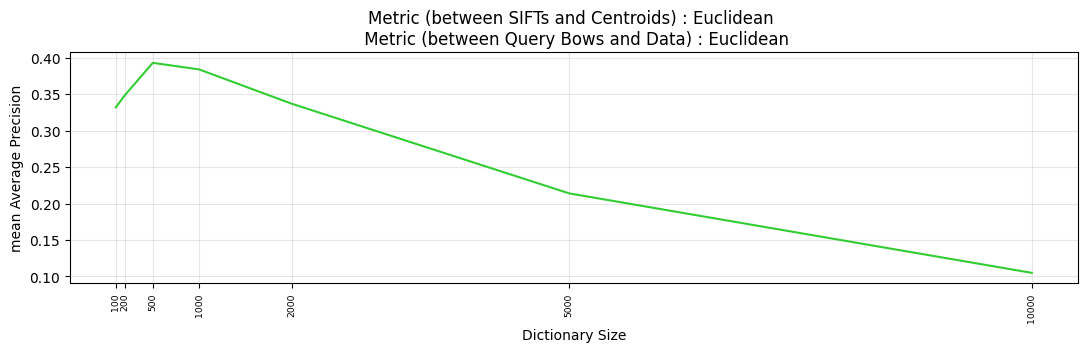

In [ ]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

dst_ports = [100, 200, 500, 1000, 2000, 5000, 10000]
dst_port_count = [0.332, 0.349, 0.393, 0.384, 0.337, 0.214, 0.105]
labels = ['100', '200', '500', '1000', '2000','5000','10000']

fig = plt.figure(figsize=(13, 10))

# aesthetics and data
plt.grid(linestyle='-', alpha = 0.3)
x = np.arange(1, len(dst_ports)+1)
#plt.bar(x, dst_port_count, align='center')
plt.xticks(dst_ports, labels, fontsize=7, rotation='vertical')
plt.plot(dst_ports, dst_port_count, color='limegreen')

# labels
plt.title('Metric (between SIFTs and Centroids) : Euclidean \n Metric (between Query Bows and Data) : Euclidean')
plt.xlabel('Dictionary Size')
plt.ylabel('mean Average Precision')

Text(0, 0.5, 'mean Average Precision')

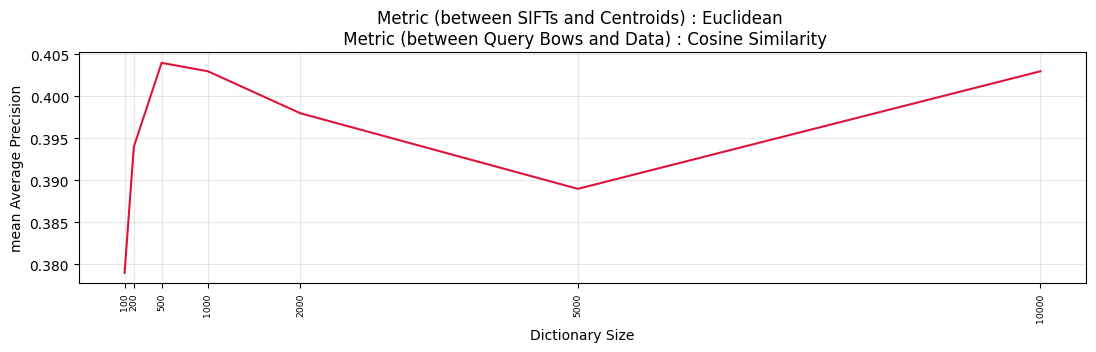

In [ ]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

dst_ports = [100, 200, 500, 1000, 2000, 5000, 10000]
dst_port_count = [0.379, 0.394, 0.404, 0.403, 0.398, 0.389, 0.403]
labels = ['100', '200', '500', '1000', '2000','5000','10000']

fig = plt.figure(figsize=(13, 10))

# aesthetics and data
plt.grid(linestyle='-', alpha = 0.3)
x = np.arange(1, len(dst_ports)+1)
#plt.bar(x, dst_port_count, align='center')
plt.xticks(dst_ports, labels, fontsize=7, rotation='vertical')
plt.plot(dst_ports, dst_port_count, color='crimson')

# labels
plt.title('Metric (between SIFTs and Centroids) : Euclidean \n Metric (between Query Bows and Data) : Cosine Similarity')
plt.xlabel('Dictionary Size')
plt.ylabel('mean Average Precision')

Text(0, 0.5, 'mean Average Precision')

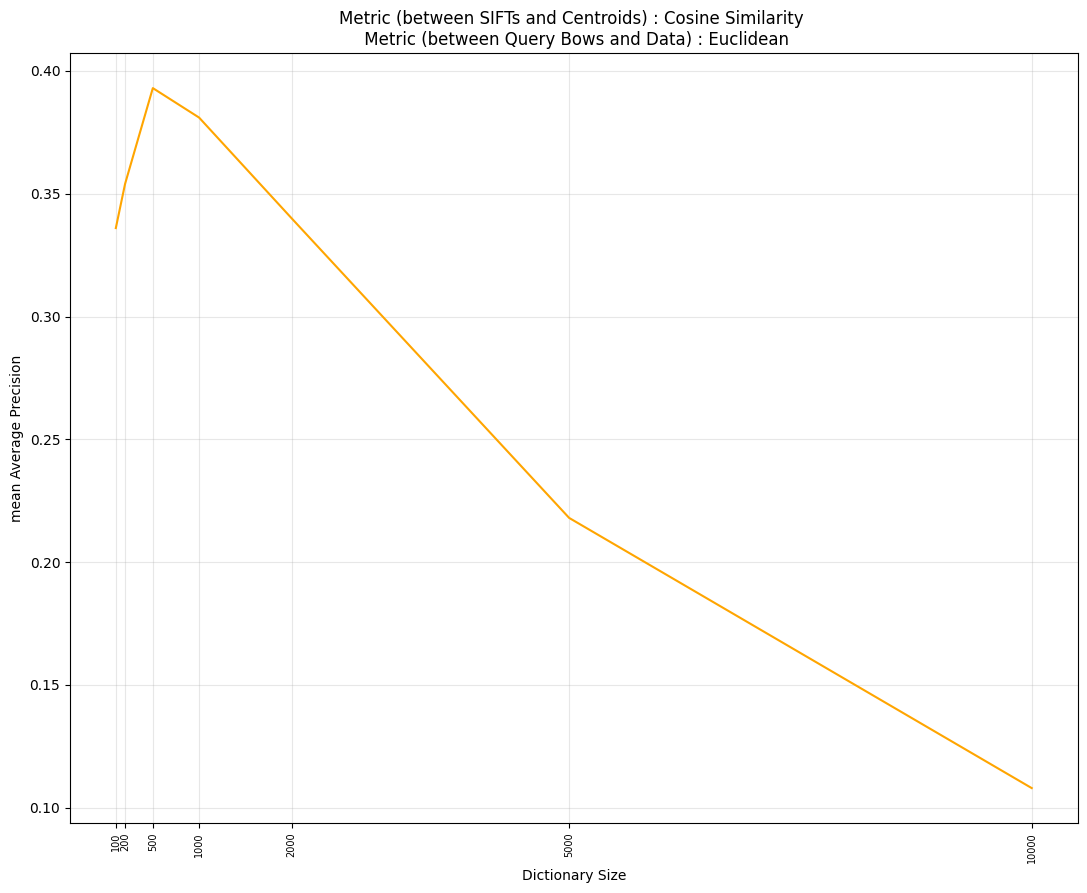

In [ ]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

dst_ports = [100, 200, 500, 1000, 2000, 5000, 10000]
dst_port_count = [0.336, 0.354, 0.393, 0.381, 0.340, 0.218 , 0.108]
labels = ['100', '200', '500', '1000', '2000','5000','10000']

fig = plt.figure(figsize=(13, 10))

# aesthetics and data
plt.grid(linestyle='-', alpha = 0.3)
x = np.arange(1, len(dst_ports)+1)
#plt.bar(x, dst_port_count, align='center')
plt.xticks(dst_ports, labels, fontsize=7, rotation='vertical')
plt.plot(dst_ports, dst_port_count, color='orange')

# labels
plt.title('Metric (between SIFTs and Centroids) : Cosine Similarity \n Metric (between Query Bows and Data) : Euclidean')
plt.xlabel('Dictionary Size')
plt.ylabel('mean Average Precision')

Text(0, 0.5, 'mean Average Precision')

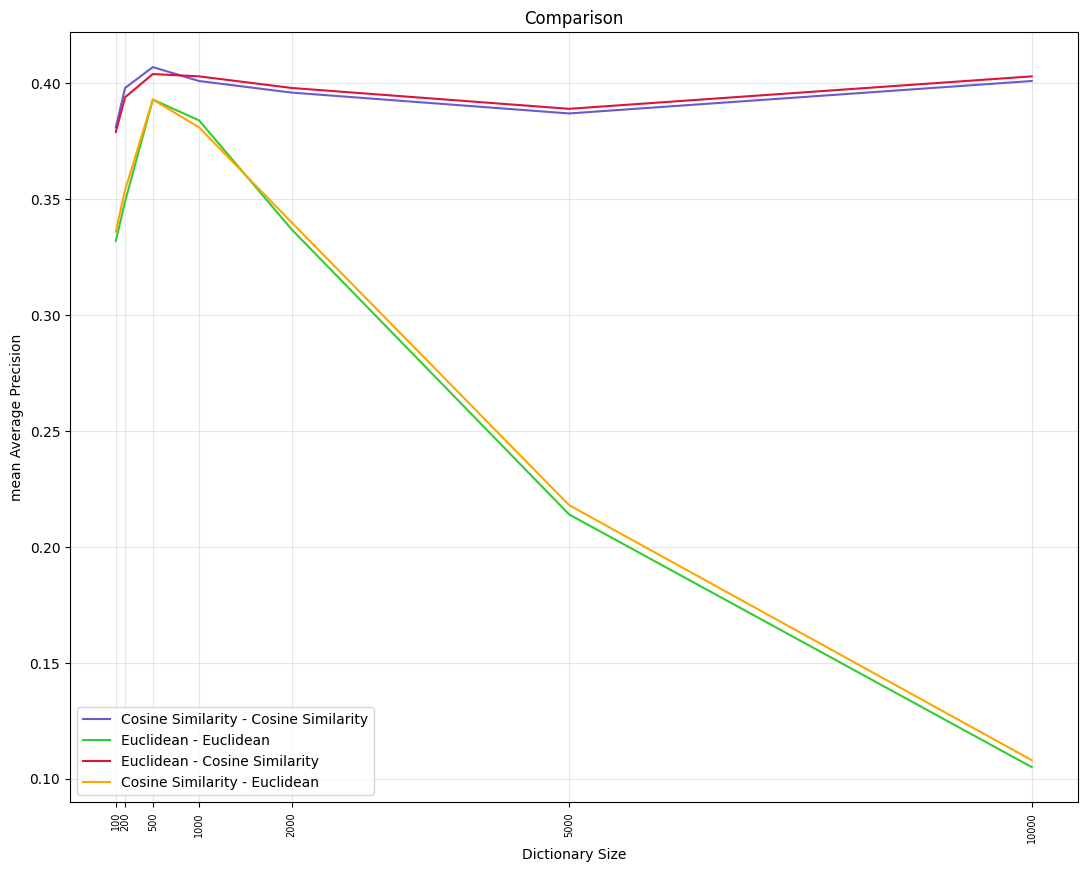

In [ ]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

dst_ports = [100, 200, 500, 1000, 2000, 5000, 10000]
dst_port_count = [0.381, 0.398, 0.407, 0.401, 0.396, 0.387, 0.401]


dst_ports_e = [100, 200, 500, 1000, 2000, 5000, 10000]
dst_port_count_e = [0.332, 0.349, 0.393, 0.384, 0.337, 0.214, 0.105]
dst_port_count_e_c = [0.379, 0.394, 0.404, 0.403, 0.398, 0.389, 0.403]
dst_port_count_c_e = [0.336, 0.354, 0.393, 0.381, 0.340, 0.218 , 0.108]

labels = ['100', '200', '500', '1000', '2000','5000','10000']

fig = plt.figure(figsize=(13, 10))

# aesthetics and data
plt.grid(linestyle='-', alpha = 0.3)
x = np.arange(1, len(dst_ports)+1)
#plt.bar(x, dst_port_count, align='center')
plt.xticks(dst_ports, labels, fontsize=7, rotation='vertical')
plt.plot(dst_ports, dst_port_count,  label='Cosine Similarity - Cosine Similarity', color ='slateblue')
plt.plot(dst_ports_e, dst_port_count_e, label='Euclidean - Euclidean', color = 'limegreen')
plt.plot(dst_ports_e, dst_port_count_e_c, label='Euclidean - Cosine Similarity', color = 'crimson')
plt.plot(dst_ports_e, dst_port_count_c_e, label='Cosine Similarity - Euclidean', color = 'orange')

plt.legend()

# labels
plt.title('Comparison')
plt.xlabel('Dictionary Size')
plt.ylabel('mean Average Precision')

##Data preparation
L'ultima cosa che dobbiamo fare è la Retrieval, calcolarsi il dizionario è lo step 0, pre-processing  (step saltato perchè lo abbiamo scaricato), poi preso il dataset di cui vogliamo misurare le performance, dobbiamo calcolarci i sift (anche questo step saltato), poi una volta che abbiamo dizionario e sift (dove siamo partiti) dobbiamo calcolarci le bow (of visual words), una volta che abbiamo le bow possiamo fare retrieval.
Per fare questo dobbiamo fare un primo step in cui andiamo a separare le immagini di query da quelle di gallery
Now we will create a separate array containing only query bows. These are the images whose names ends by "00" or whose id divides by 100.

- Dobbiamo separare query e gallery

In [ ]:
# get the indices of the query images (the subset of images that end in "00") QUERY, prendiamo tutti i nomi delle immagini di query che finiscono 00
# andiamo a filtrare le bow delle query
# ogni dataset è fatto a modo suo, in questo tutte le immagini che finiscono con 00 sono di query
# andiamo a prendere tutti i nomi delle immagini che finiscono con 00
query_imids = [i for i, name in enumerate(imnames) if name[-2:] == "00"]

# e poi andiamo a prendere le bow delle query
# corresponding descriptors
query_bows = bow_array[query_imids]

In [ ]:
query_bows.shape
# le query delle bow sono 500




(500, 500)

# Retrieve!

##Exercise 3

Dobbiamo calcolarci tutte le distanze fra le query e i dati, quindi andiamo a calcolarci le distanze o similitudine (passo 1)
(passo 2) costruire una matrice che contiene in ogni riga gli indici ordinati dal più grande al più piccolo di queste similitudini o distanze (qui dalla più piccola alla più grande), in maniera tale che nella prima posizione della matrice delle distanze c'è l'elemento più vicino alla nostra query
TIP: usare nn, perché in input un bow delle query, quindi un istogramma, e dovete estrarre qual è l'istogramma tra tutti il bow_array più vicino alla nostra query. Si possono usare tante distanze come quella coseno, ma siccome parliamo di istogrammi usiamo l'intersezione di istogrammi, ma non è implementata dentro nn, quindi usiamo la coseno che va bene lo stesso (cambiare nel report)

andiamo a usare queste bow delle immagini per andare a fare retrieval, andiamo a prendere le immagini di query e andiamo a fare una ricerca tra le bow nelle immagini nella nostra cartella in galleria e cerchiamo le immagini più simili alle query, questo si fa:

1.   compute all distances between queries and data (confronto tra bow)
2.   create a matrix containing for each row indices, sorted by decreasing similarity with the query, fare un ranking

store distances in a variable:
nella matrice delle distanze, nel primo elemento c'è l'elemento più vicino

```
distances
```
 and image ids, ranked in the variable:


```
indices
```

indices is an integer array that should have shape: (500,1491)







In [ ]:
def histogram_intersection(a, b):
  return 1 - np.sum(np.minimum(a/0.00001 + np.sum(a)), b/(0.00001 + np.sum(b)))

from sklearn.neighbors import NearestNeighbors#

nbrs = NearestNeighbors(n_neighbors=1491, algorithm='auto', metric='euclidean').fit(bow_array) # ci dà i vicini di tutte le query, lista di indici ordinati lunga 1491
distances, indices = nbrs.kneighbors(query_bows)
indices.shape

# le distanze e gli indici sono già ordinati
# si va a fittare il bow_array e gli diamo come neighbor tutte le possibile immagini (potevo prendere anche le 5 più vicini o la più vicina)
# definisco i vicini, faccio un fit nel bow_array (voglio cercare qui)
# gli passiamo le query, prende le query e fa il confronto con tutti gli elementi del dataset (1491)


(500, 1491)

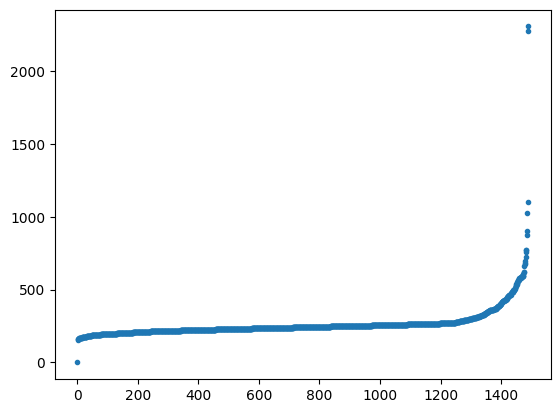

'132101'

In [ ]:
plt.plot(distances[0],'.')
plt.show()
imnames[1]
# il puntino solo è lui stesso, la query stessa, perchè non abbiamo tolto la query
# plot delle distanze dell'elemento 0
# del query set abbiamo preso la prima immagine e abbiamo plottato le distanze che sono il risultato della mia query contro tutti bow_array
# ci saranno pochi elementi più simili, man mano che mi allontano ci saranno immagini sempre più lontane

# cosa è il puntino? ha distanza 0, perché è lui stesso, perché dalla bow_array nonn abbiamo tolto le query, quindi trova sè stesso
# o si tolgono le query o si esclude il primo elemento nel conteggio delle performance
# il secondo puntino è il suo vero primo vicino
# le distanze sono già ordinate



# RECAP
# oggi concludiamo la valutazione dei sift, usando le bow: andremo ad utilizzare le bow che abbiamo creato partendo dal dizionario di flicker, e andremo a vedere come calcolare la mean average precision, quindi le performance, di questo modello bow
# abbiamo visto che una volta estratte tutte le bow, quindi abbiamo un array di bow, andavamo a separare le query dalle gallery, quindi andavamo a prendere le bow delle query, e andavamo a calcolarci le distanze
# le distanze sono state calcolate con nn, quindi andavamo a dire "trovami all'interno del bow_array, per tutte le query trovami i più vicini (1491), quindi abbiamo tutte le immagini come vicini"
# andavamo a trovare le distanze di tutti i vicini di tutte le query (che sono 500), per ogni query si va a trovare una lista di indici ordinati lunga 1491, ovvero tutte le immagini
# abbiamo plottato la DISTANZA DELLA PRIMA QUERY
# il puntino era la stessa query, non lo avevamo tolto
# ci sono pochi elementi vicini alla query, molti a media distanza e pohi sono lontani

# il nostro scopo è, sulla base degli indici che sono stati ritrovati, andare la mean average precision
# ma come costruisco queste curve?


#How did we do?
In retrieval we use mean Average Precision (mAP for short). It is the average precision value computed over a range of recall values. This can be also seen as the area below the Precision-Recal Plot

Nelle y si mette la Precision, nella x la Recall, ci dicono quando siamo stati precisi nel trovare, in un certo range, gli elementi corretti (Precision) e quando siamo stati accurati nel farlo (Recall)

![Average Precision](http://scikit-learn.org/stable/_images/sphx_glr_plot_precision_recall_001.png)

Average precision evaluate how good a ranking is. This means that a high mAP corresponds to a ranking with the few relevant images in the first positions.

##Questions

1.   What happens when you increase/decrease the dictionary size?
2.   What metrics can you employ for computing the distances? Try a few of them
3.   What normalization strategy can be used on a BoW?

In [ ]:
#this function creates a perfect ranking :)
def make_perfect_holidays_result(imnames, q_ids):
  perfect_idx =[]
  for qimno in q_ids:
      qname = imnames[qimno]
      positive_results = set([i for i, name in enumerate(imnames) if name != qname and name[:4] == qname[:4]])
      ok=[qimno]+[i for i in  positive_results]
      others = [i for i in range(1491) if i not in positive_results and i != qimno]
      perfect_idx.append(ok+others)
  return np.array(perfect_idx)

In [ ]:
# funzione di valutazione, sono spesso già fatte, non farle
# una volta estratti tutti i descrittori di query e gallery, prendiamo la funzione di map e si va a fare un plot
# il plot ci dà un rank

def mAP(q_ids, idx): # prende input id delle query e degli indici
  aps = []
  for qimno, qres in zip(q_ids, idx): # prende il primo elemento della prima lista e il primo della seconda lista e li mette insieme, devono avere la stessa dimensione sull'asse 0
      qname = imnames[qimno]
      # collect the positive results in the dataset
      # the positives have the same prefix as the query image
      positive_results = set([i for i, name in enumerate(imnames)
                              if name != qname and name[:4] == qname[:4]]) # insieme di una lista in cui andiamo a prendere l'id (posizione) e nome immagine, si elimina quando il nome coincide (il puntino)
      #
      # ranks of positives. We skip the result #0, assumed to be the query image
      ranks = [i for i, res in enumerate(qres[1:]) if res in positive_results] # 1 per evitare la prima posizione, idealmente ranks = positive_results (ma non succede mai.. è la ground truth, per avere precision = 1)
      #
      # accumulate trapezoids with this basis
      recall_step = 1.0 / len(positive_results)
      ap = 0
      for ntp,rank in enumerate(ranks):
          # ntp = nb of true positives so far
          # rank = nb of retrieved items so far
          # y-size on left side of trapezoid:
          precision_0 = ntp/float(rank) if rank > 0 else 1.0
          # y-size on right side of trapezoid:
          precision_1 = (ntp + 1) / float(rank + 1)
          ap += (precision_1 + precision_0) * recall_step / 2.0 # si va a vedere, per ogni livello di recall, come cambia la precision
      #print('query %s, AP = %.3f' % (qname, ap))
      aps.append(ap) # si appendono per ogni livello di recall
  return np.mean(aps) # si fa la media e se ne calcola la map

print('mean AP = %.3f'%mAP(query_imids, indices)) # gli passiamo id delle query e indici (più vicini delle query) # gli passiamo l'array degli id delle query e gli indici che sono stati ritrovati com e "più vicini" per ogni query
perfect_result=make_perfect_holidays_result(imnames, query_imids) # per capire cosa succede quando è perfetto il risultato
print('Perfect mean AP = %.3f'%mAP(query_imids,perfect_result))


mean AP = 0.393
Perfect mean AP = 1.000


**Distance Metric (between SIFTs and Centroids) : Cosine Similarity**

**Distance Metric (between Query Bows and Data) : Cosine Similarity**


**dizionario 100:**
mean AP = 0.381
Perfect mean AP = 1.000

**dizionario 200:**
mean AP = 0.398
Perfect mean AP = 1.000

**dizionario 500**
mean AP = 0.407
Perfect mean AP = 1.000

**dizionario 1000**
mean AP = 0.401
Perfect mean AP = 1.000

**dizionario 2000:**
mean AP = 0.396
Perfect mean AP = 1.000

**dizionario 5000:**
mean AP = 0.387
Perfect mean AP = 1.000

**dizionario 10000**
mean AP = 0.401
Perfect mean AP = 1.000

**Distance Metric (between SIFTs and Centroids) : Euclidean**

**Distance Metric (between Query Bows and Data) : Euclidean**

**dizionario 100:**
mean AP = 0.332
Perfect mean AP = 1.000

**dizionario 200:**
mean AP = 0.349
Perfect mean AP = 1.000

**dizionario 500**
mean AP = 0.393
Perfect mean AP = 1.000

**dizionario 1000**
mean AP = 0.384
Perfect mean AP = 1.000

**dizionario 2000:**
mean AP = 0.337
Perfect mean AP = 1.000

**dizionario 5000:**
mean AP = 0.214
Perfect mean AP = 1.000

**dizionario 10000**
mean AP = 0.105
Perfect mean AP = 1.000


In [ ]:
# get a dataset of resized images to display results
# scarica una versione del dataset ridotta, per plottarla
!wget https://www.dropbox.com/s/2jcmfatyajk09na/holidays_small.tar.gz
with io.capture_output() as extracted_files: # this will avoid cluttering with the output. Remove this line to see command line output
  !tar xzvf holidays_small.tar.gz



--2023-10-30 07:24:31--  https://www.dropbox.com/s/2jcmfatyajk09na/holidays_small.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2jcmfatyajk09na/holidays_small.tar.gz [following]
--2023-10-30 07:24:31--  https://www.dropbox.com/s/raw/2jcmfatyajk09na/holidays_small.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb8065966941eca1050b1a1ddba.dl.dropboxusercontent.com/cd/0/inline/CGmB1ocsz36Gau6CTPb4c4iZNOr5l25W3iR1R2O8qkcQfDHOmpNc5HrviAGWwjnAoZbcWpZByitO8IHn2auaPl6mzkUQfDYmkNE572euhsw8rUcY_ttbMTbKPQxGQw1xu7d43-lkMdQHpSXPkmiknyuy/file# [following]
--2023-10-30 07:24:33--  https://ucb8065966941eca1050b1a1ddba.dl.dropboxusercontent.com/cd/0/inline/CGmB1ocsz36Gau6CTPb4c4iZNOr5l25W3iR1R2O8qkcQfDHOmpNc5HrviAGWwjnAoZbcWpZByi

In [ ]:
import PIL

import math
def montage(imfiles, thumb_size=(100,100), ok=None, shape=None ):
  #this function will create an image with thumbnailed version of imfiles.
  #optionally the user can provide an ok list such that len(ok)==len(imfiles) to differentiate correct from wrong results
  #optionally the user can provide a shape function which shapes the montage otherwise a square image is created.
  images = [PIL.Image.open(imname).resize(thumb_size,PIL.Image.BILINEAR) for imname in imfiles]
  #create a big image to contain all images
  if shape is None:
    n = int(math.sqrt(len(imfiles)))
    m=n
  else:
    n=shape[0]
    m=shape[1]
  new_im = PIL.Image.new('RGB', (m*thumb_size[0],n*thumb_size[0]))
  k=0
  for i in range(0,n*thumb_size[0], thumb_size[0]):
    for j in range(0,m*thumb_size[0], thumb_size[0]):
      region=(j,i)
      if ok is not None:
        if ok[k]:
          color = (0,255,0)
        else:
          color  = (255,0,0)
        if k > 0:
          imar = np.array(images[k],dtype=np.uint8)
          imar[0:5,:,:] = color;
          imar[:,0:5,:] = color;
          imar[-5:,:,:] = color;
          imar[:,-5:,:] = color;
          images[k]=PIL.Image.fromarray(imar)
      new_im.paste(images[k] ,box=region)
      k+=1
  return new_im

#Qualitative Result Inspection
It is often interesting to observe the behavior of our algorithms qualitatively. We can often learn a lot about the features we are using and how their invariance and robustness to transformations can help retrieval.

##Exercise 4
Considering that we are using SIFT quantized with Bag of Words. Use the tool provided for visualization and pick few examples that explain clearly what are the invariances of the local SIFT feature descriptor/detector.

In [ ]:
#here we show the first 10 queries and their 10 closest neighbours retrieved
#gree border means ok, red wrong :)
def show_result(display_idx, nqueries=10, nresults=10,ts=(100,100)):

  from IPython.display import display
  if nqueries is not None :
    nrow = nqueries   # number of query images to show

  if nresults is not None :
    nres = 10  # number of results per query

  for qno in range(nrow):
      imfiles=[]
      oks = [True]
      # show query image with white outline
      qimno = query_imids[qno]
      imfiles.append('holidays_small/'+imnames[qimno]+'.jpg')
      for qres in display_idx[qno, :nres]:
          # use image name to determine if it is a TP or FP result
          oks.append(imnames[qres][:4] == imnames[qimno][:4])
          imfiles.append('holidays_small/'+imnames[qres]+'.jpg')
      print (qno, (imfiles))
      display(montage(imfiles,thumb_size=ts,ok=oks, shape=(1,nres)))



0 ['holidays_small/113000.jpg', 'holidays_small/113000.jpg', 'holidays_small/114400.jpg', 'holidays_small/116701.jpg', 'holidays_small/116702.jpg', 'holidays_small/122501.jpg', 'holidays_small/119100.jpg', 'holidays_small/122500.jpg', 'holidays_small/114401.jpg', 'holidays_small/122900.jpg', 'holidays_small/113001.jpg']


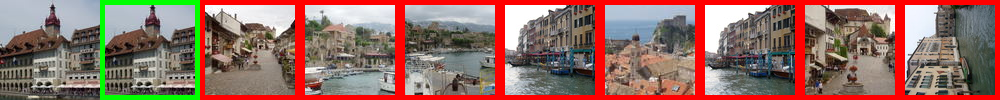

1 ['holidays_small/131900.jpg', 'holidays_small/131900.jpg', 'holidays_small/108103.jpg', 'holidays_small/126806.jpg', 'holidays_small/142003.jpg', 'holidays_small/138803.jpg', 'holidays_small/138309.jpg', 'holidays_small/142000.jpg', 'holidays_small/142001.jpg', 'holidays_small/131801.jpg', 'holidays_small/140000.jpg']


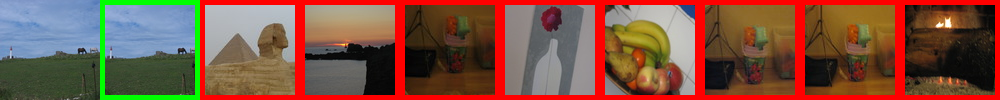

2 ['holidays_small/109600.jpg', 'holidays_small/109600.jpg', 'holidays_small/112407.jpg', 'holidays_small/113601.jpg', 'holidays_small/112404.jpg', 'holidays_small/112408.jpg', 'holidays_small/112405.jpg', 'holidays_small/112406.jpg', 'holidays_small/119800.jpg', 'holidays_small/112403.jpg', 'holidays_small/123800.jpg']


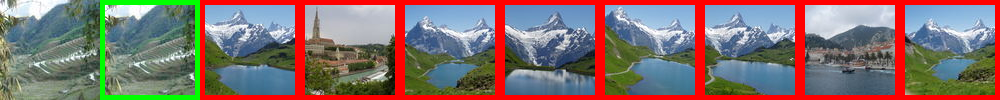

3 ['holidays_small/142500.jpg', 'holidays_small/142500.jpg', 'holidays_small/142502.jpg', 'holidays_small/138300.jpg', 'holidays_small/101001.jpg', 'holidays_small/129701.jpg', 'holidays_small/116500.jpg', 'holidays_small/138600.jpg', 'holidays_small/115001.jpg', 'holidays_small/138302.jpg', 'holidays_small/108106.jpg']


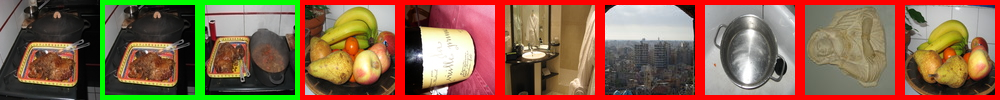

4 ['holidays_small/100600.jpg', 'holidays_small/100600.jpg', 'holidays_small/141400.jpg', 'holidays_small/141702.jpg', 'holidays_small/109300.jpg', 'holidays_small/144500.jpg', 'holidays_small/109700.jpg', 'holidays_small/110001.jpg', 'holidays_small/102100.jpg', 'holidays_small/135900.jpg', 'holidays_small/141901.jpg']


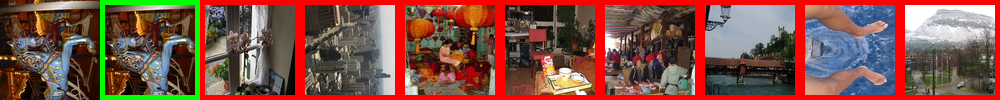

5 ['holidays_small/111000.jpg', 'holidays_small/111000.jpg', 'holidays_small/111001.jpg', 'holidays_small/111002.jpg', 'holidays_small/130800.jpg', 'holidays_small/130801.jpg', 'holidays_small/130802.jpg', 'holidays_small/115300.jpg', 'holidays_small/146701.jpg', 'holidays_small/115301.jpg', 'holidays_small/130000.jpg']


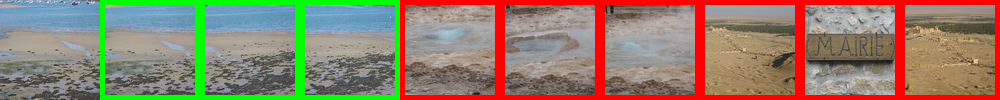

6 ['holidays_small/149800.jpg', 'holidays_small/149800.jpg', 'holidays_small/113402.jpg', 'holidays_small/113502.jpg', 'holidays_small/137900.jpg', 'holidays_small/141400.jpg', 'holidays_small/109300.jpg', 'holidays_small/121201.jpg', 'holidays_small/117401.jpg', 'holidays_small/121100.jpg', 'holidays_small/141704.jpg']


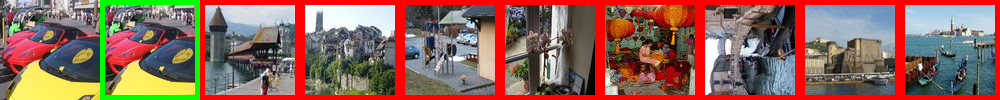

7 ['holidays_small/142200.jpg', 'holidays_small/142200.jpg', 'holidays_small/109701.jpg', 'holidays_small/142201.jpg', 'holidays_small/122000.jpg', 'holidays_small/122800.jpg', 'holidays_small/122302.jpg', 'holidays_small/136008.jpg', 'holidays_small/118402.jpg', 'holidays_small/113403.jpg', 'holidays_small/149604.jpg']


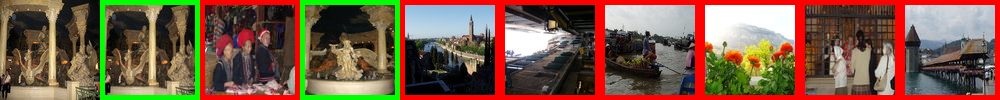

8 ['holidays_small/134200.jpg', 'holidays_small/134200.jpg', 'holidays_small/143500.jpg', 'holidays_small/126704.jpg', 'holidays_small/126700.jpg', 'holidays_small/104402.jpg', 'holidays_small/112601.jpg', 'holidays_small/143803.jpg', 'holidays_small/143801.jpg', 'holidays_small/111300.jpg', 'holidays_small/147102.jpg']


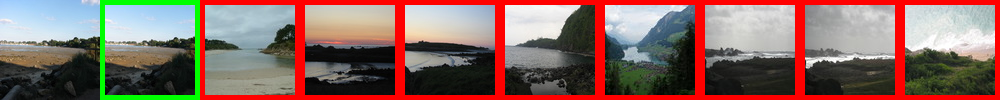

9 ['holidays_small/106800.jpg', 'holidays_small/106800.jpg', 'holidays_small/106801.jpg', 'holidays_small/100200.jpg', 'holidays_small/103102.jpg', 'holidays_small/103902.jpg', 'holidays_small/103702.jpg', 'holidays_small/146500.jpg', 'holidays_small/103101.jpg', 'holidays_small/103901.jpg', 'holidays_small/123201.jpg']


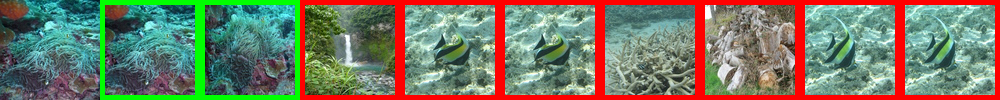

In [ ]:
show_result(indices)
# la prima è la query (0), e poi in che ordine sono state ritrovate le altre (la 1 è sempre se stessa)
# 2 diversa, ha sbagliato!! (lo vedi dall'id)

# le altre righe: alcune ok

# quello che il nostro metodo ha fatto

# è l'ordine con cui sono state ritrovate le immagini nel dataset

0 ['holidays_small/113000.jpg', 'holidays_small/113000.jpg', 'holidays_small/113001.jpg', 'holidays_small/124601.jpg', 'holidays_small/132101.jpg', 'holidays_small/134003.jpg', 'holidays_small/135101.jpg', 'holidays_small/110101.jpg', 'holidays_small/117501.jpg', 'holidays_small/100101.jpg', 'holidays_small/104101.jpg']


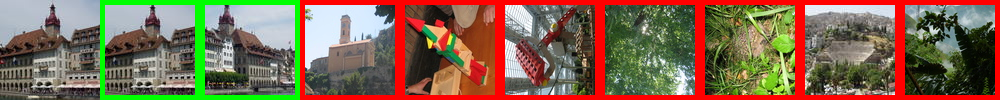

1 ['holidays_small/131900.jpg', 'holidays_small/131900.jpg', 'holidays_small/131901.jpg', 'holidays_small/124601.jpg', 'holidays_small/132101.jpg', 'holidays_small/134003.jpg', 'holidays_small/135101.jpg', 'holidays_small/113000.jpg', 'holidays_small/110101.jpg', 'holidays_small/117501.jpg', 'holidays_small/100101.jpg']


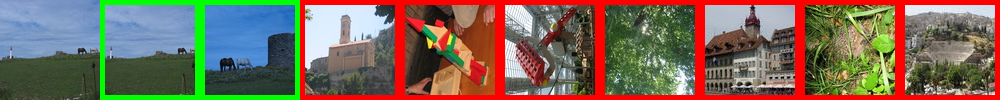

2 ['holidays_small/109600.jpg', 'holidays_small/109600.jpg', 'holidays_small/109601.jpg', 'holidays_small/124601.jpg', 'holidays_small/132101.jpg', 'holidays_small/134003.jpg', 'holidays_small/135101.jpg', 'holidays_small/113000.jpg', 'holidays_small/110101.jpg', 'holidays_small/117501.jpg', 'holidays_small/100101.jpg']


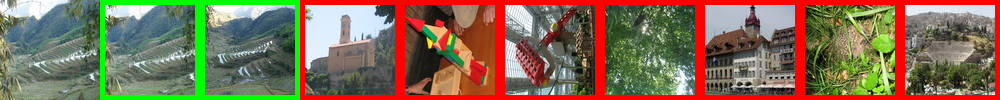

3 ['holidays_small/142500.jpg', 'holidays_small/142500.jpg', 'holidays_small/142502.jpg', 'holidays_small/142501.jpg', 'holidays_small/124601.jpg', 'holidays_small/132101.jpg', 'holidays_small/134003.jpg', 'holidays_small/135101.jpg', 'holidays_small/113000.jpg', 'holidays_small/110101.jpg', 'holidays_small/117501.jpg']


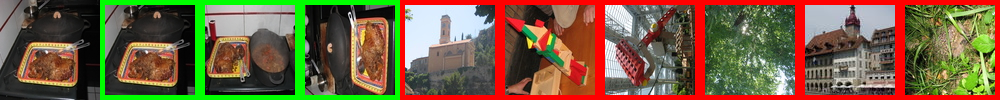

4 ['holidays_small/100600.jpg', 'holidays_small/100600.jpg', 'holidays_small/100601.jpg', 'holidays_small/124601.jpg', 'holidays_small/132101.jpg', 'holidays_small/134003.jpg', 'holidays_small/135101.jpg', 'holidays_small/113000.jpg', 'holidays_small/110101.jpg', 'holidays_small/117501.jpg', 'holidays_small/100101.jpg']


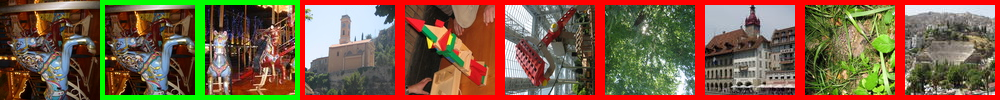

5 ['holidays_small/111000.jpg', 'holidays_small/111000.jpg', 'holidays_small/111002.jpg', 'holidays_small/111001.jpg', 'holidays_small/124601.jpg', 'holidays_small/132101.jpg', 'holidays_small/134003.jpg', 'holidays_small/135101.jpg', 'holidays_small/113000.jpg', 'holidays_small/110101.jpg', 'holidays_small/117501.jpg']


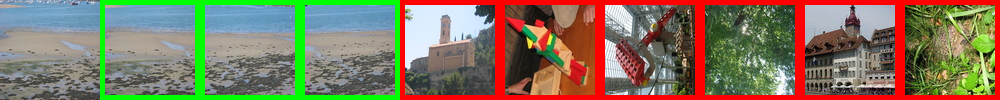

6 ['holidays_small/149800.jpg', 'holidays_small/149800.jpg', 'holidays_small/149801.jpg', 'holidays_small/124601.jpg', 'holidays_small/132101.jpg', 'holidays_small/134003.jpg', 'holidays_small/135101.jpg', 'holidays_small/113000.jpg', 'holidays_small/110101.jpg', 'holidays_small/117501.jpg', 'holidays_small/100101.jpg']


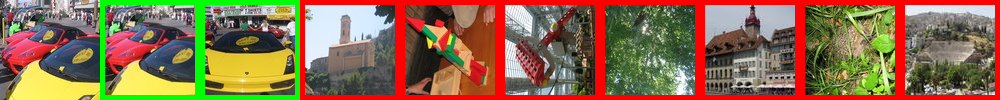

7 ['holidays_small/142200.jpg', 'holidays_small/142200.jpg', 'holidays_small/142201.jpg', 'holidays_small/124601.jpg', 'holidays_small/132101.jpg', 'holidays_small/134003.jpg', 'holidays_small/135101.jpg', 'holidays_small/113000.jpg', 'holidays_small/110101.jpg', 'holidays_small/117501.jpg', 'holidays_small/100101.jpg']


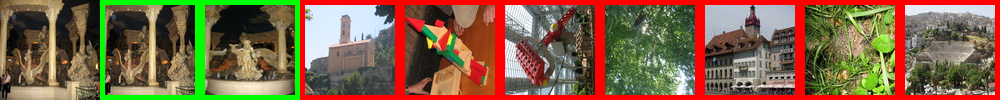

8 ['holidays_small/134200.jpg', 'holidays_small/134200.jpg', 'holidays_small/134201.jpg', 'holidays_small/124601.jpg', 'holidays_small/132101.jpg', 'holidays_small/134003.jpg', 'holidays_small/135101.jpg', 'holidays_small/113000.jpg', 'holidays_small/110101.jpg', 'holidays_small/117501.jpg', 'holidays_small/100101.jpg']


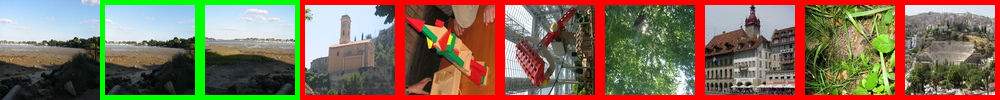

9 ['holidays_small/106800.jpg', 'holidays_small/106800.jpg', 'holidays_small/106801.jpg', 'holidays_small/124601.jpg', 'holidays_small/132101.jpg', 'holidays_small/134003.jpg', 'holidays_small/135101.jpg', 'holidays_small/113000.jpg', 'holidays_small/110101.jpg', 'holidays_small/117501.jpg', 'holidays_small/100101.jpg']


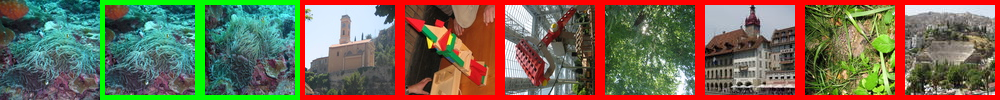

In [ ]:
show_result(perfect_result)
# ground truth, quello che idealmente dovrebbe fare

# la webcam è stata ritrovata correttamente nonostante le trasformazioni geometriche (nei risultati non l'ha trovata, anche a causa della diversa luce)
# per il faro invece ha difficoltà (nei nostri risultati, non ha ritrovato la versione orizzontale)
# per lo scalatore non abbiamo grandi cambiamenti, facile da ritrovare, non è ruotato o scalato, cambia solo l'uomo dentro, la luce e la scala era la stessa nelle due immagini




In [ ]:
#here we show the first 25 queries and their 15 closest neighbours retrieved
#gree border means ok, red wrong :)
display_idx = indices
#display_idx = perfect_result # displays output of perfect system

from IPython.display import display
nrow = 500   # number of query images to show
nres = 10  # number of results per query

#for qno in range(nrow):
for qno in [5, 224,347,446]:
    imfiles=[]
    oks = [True]
    # show query image with white outline
    qimno = query_imids[qno]
    imfiles.append('holidays_small/'+imnames[qimno]+'.jpg')
    for qres in display_idx[qno, :nres]:
        # use image name to determine if it is a TP or FP result
        oks.append(imnames[qres][:4] == imnames[qimno][:4])
        imfiles.append('holidays_small/'+imnames[qres]+'.jpg')
    print (qno, (imfiles))
    display(montage(imfiles,thumb_size=(300,300),ok=oks, shape=(1,nres)))

    # come prima